In [ ]:
! gdown --id 1ZkAd2URfLRUrXEQ2mres4me8Rw5hsuOm

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZkAd2URfLRUrXEQ2mres4me8Rw5hsuOm
To: /content/messidor.zip
100% 550M/550M [00:10<00:00, 50.3MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/messidor.zip"

with ZipFile(file_name,'r') as openZip:
  openZip.extractall()
  print('Done')

Done


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_data = train_datagen.flow_from_directory(directory = '/content/messidor/train_data',
                                                  batch_size = 32,
                                                  target_size = (512, 512),
                                                  class_mode = 'categorical',
                                                  seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = '/content/messidor/validation_data',
                                                 batch_size = 32,
                                                 target_size = (512, 512),
                                                 class_mode = 'categorical',
                                                 seed = 42)

test_data = test_datagen.flow_from_directory(directory = '/content/messidor/test_data',
                                                classes=['0','1', '2', '3'],
                                                 batch_size = 32,
                                                 target_size = (512, 512),
                                                 class_mode = 'categorical',
                                                 seed = 42)

Found 1613 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# create tensorboard callback

import datetime

def create_tensorboard_callback2(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M")
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir= log_dir)
  return tensorboard_callbacks

In [ ]:
def create_model(model_url, num_classes = 4):
  '''
  Takes a Tensorflow hub urla nd creates a keras Sequential model with it

  Args:
    model_url(str): A tensorflow hub feature extraction URL.
    num_classes (int): Number of output neuraons in the output layer,
      should be equal to Number of target classes, default 10.

  Return:
     An uncompiled Keras Sequentail model with model_url as feature extractor
     layer and Dense output layer with num_classes output neurons.
  '''
  feature_extractor_layer = hub.KerasLayer(model_url,
                                          trainable = False,
                                          name = 'feature_extration_layer',
                                          input_shape = (512, 512, 3)) # Freeze the already learned patterns

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
  ])

  return model

In [ ]:
resenet_url = "https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5"
resnet = create_model(resenet_url,
                      num_classes=4)

In [ ]:
resnet.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
from keras import callbacks
resnet.fit(train_data,
           steps_per_epoch=len(train_data),
           callbacks = create_tensorboard_callback("/content/tensoflow_callbacks", "resnet_10_percent"),
           validation_data=test_data,
           epochs=5)

Epoch 1/5
51/51 [==============================] - 79s 1s/step - loss: 71.4796 - accuracy: 0.2381 - val_loss: 35.3680 - val_accuracy: 0.1458
Epoch 2/5
51/51 [==============================] - 64s 1s/step - loss: 21.3277 - accuracy: 0.3063 - val_loss: 24.2091 - val_accuracy: 0.1667
Epoch 3/5
51/51 [==============================] - 65s 1s/step - loss: 13.4060 - accuracy: 0.2883 - val_loss: 25.7329 - val_accuracy: 0.1792
Epoch 4/5
51/51 [==============================] - 65s 1s/step - loss: 30.3842 - accuracy: 0.2914 - val_loss: 23.3170 - val_accuracy: 0.1583
Epoch 5/5
51/51 [==============================] - 66s 1s/step - loss: 29.8610 - accuracy: 0.2827 - val_loss: 18.8017 - val_accuracy: 0.1583


In [ ]:
efficient_net_url = "https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5"
E_net = create_model(resenet_url,
                      num_classes=4)

In [ ]:
E_net.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
from keras import callbacks
E_net.fit(train_data,
           steps_per_epoch=len(train_data),
           callbacks = create_tensorboard_callback("/content/tensoflow_callbacks", "resnet_10_percent"),
           validation_data=test_data,
           epochs=5)

Epoch 1/5
51/51 [==============================] - 71s 1s/step - loss: 70.9226 - accuracy: 0.2858 - val_loss: 18.9738 - val_accuracy: 0.2667
Epoch 2/5
51/51 [==============================] - 65s 1s/step - loss: 19.9318 - accuracy: 0.2994 - val_loss: 12.3656 - val_accuracy: 0.3417
Epoch 3/5
51/51 [==============================] - 65s 1s/step - loss: 28.6833 - accuracy: 0.2864 - val_loss: 18.4931 - val_accuracy: 0.3542
Epoch 4/5
51/51 [==============================] - 65s 1s/step - loss: 35.4666 - accuracy: 0.2821 - val_loss: 8.3764 - val_accuracy: 0.3083
Epoch 5/5
51/51 [==============================] - 65s 1s/step - loss: 37.9486 - accuracy: 0.2889 - val_loss: 60.1420 - val_accuracy: 0.1458


In [ ]:
E_net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extration_layer (Ke  (None, 2048)             23561152  
 rasLayer)                                                       
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 23,569,348
Trainable params: 8,196
Non-trainable params: 23,561,152
_________________________________________________________________


In [ ]:
! gdown --id 1jOePlBj7WzMzZ3uPC4g6Ny-eC3yFTbrN

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jOePlBj7WzMzZ3uPC4g6Ny-eC3yFTbrN
To: /content/messidor_150.zip
100% 375M/375M [00:12<00:00, 30.7MB/s]


In [ ]:
 ! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-23 18:21:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-23 18:21:33 (74.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
! gdown --id 1_KrmbjSPeGCVsjAj-dUpyeffW9mde7ap

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_KrmbjSPeGCVsjAj-dUpyeffW9mde7ap
To: /content/test_data.zip
100% 99.9M/99.9M [00:02<00:00, 34.0MB/s]


In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
unzip_data('messidor_150.zip')

In [ ]:
unzip_data('test_data.zip')

In [ ]:
train_dir = "/content/messidor_150/train_data"
valid_dir = "/content/messidor_150/validation_data"
test_dir = "/content/test_data"

In [ ]:
import tensorflow as tf

In [ ]:
Img_size = (512, 512)
Batch_size = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'categorical',
                                                                 batch_size=Batch_size,
                                                                 image_size=Img_size,)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(valid_dir,
                                                                 label_mode='categorical',
                                                                 batch_size = Batch_size,
                                                                 image_size = Img_size)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                class_names=['0','1','2','3'],
                                                                label_mode='categorical',
                                                                batch_size=Batch_size,
                                                                image_size=Img_size)

Found 571 files belonging to 4 classes.
Found 160 files belonging to 4 classes.
Found 240 files belonging to 4 classes.


In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name+'/'+experiment_name
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
  print(f'saving TensorBoard log files to : {log_dir}')
  return tensorboard_callback

In [ ]:
checkpoint_path1 = "model1_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path1,
                                                         monitor='val_loss',
                                                         verbose = 1,
                                                         save_weights_only=True,
                                                         save_best_only=True)
checkpoint_path2 = "model2_weights/checkpoint.ckpt"

checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path2,
                                                         monitor='val_loss',
                                                         verbose = 1,
                                                         save_weights_only=True,
                                                         save_best_only=True)

In [ ]:
def create_checkpoint(checkpoint_path):
  return tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                            monitory = 'val_loss',
                                            verbose = 1,
                                            save_weights_only = True,
                                            save_best_only = True)

## Model 1 - 150 each class, except class 1(118) - No Data Augmentation, feature extractor

EfficientNetB0

In [ ]:
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(512, 512, 3))

x = base_model(inputs)

x = GlobalAveragePooling2D()(x)

x = Dense(4, activation = 'softmax')(x)

model1 = tf.keras.Model(inputs = inputs, outputs = x)

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
model1.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(train_data,
                      epochs = 15,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data),
                      callbacks = [create_tensorboard_callback('tensorboard/','model1_feature_extracter'),checkpoint_callback]
           )

saving TensorBoard log files to : tensorboard//model1_feature_extracter
Epoch 1/15
18/18 [==============================] - ETA: 0s - loss: 1.3648 - accuracy: 0.3222
Epoch 1: val_loss improved from inf to 1.34013, saving model to model1_weights/checkpoint.ckpt
18/18 [==============================] - 21s 710ms/step - loss: 1.3648 - accuracy: 0.3222 - val_loss: 1.3401 - val_accuracy: 0.2688
Epoch 2/15
18/18 [==============================] - ETA: 0s - loss: 1.3384 - accuracy: 0.3450
Epoch 2: val_loss improved from 1.34013 to 1.31803, saving model to model1_weights/checkpoint.ckpt
18/18 [==============================] - 14s 546ms/step - loss: 1.3384 - accuracy: 0.3450 - val_loss: 1.3180 - val_accuracy: 0.4125
Epoch 3/15
18/18 [==============================] - ETA: 0s - loss: 1.3163 - accuracy: 0.4203
Epoch 3: val_loss did not improve from 1.31803
18/18 [==============================] - 13s 567ms/step - loss: 1.3163 - accuracy: 0.4203 - val_loss: 1.3231 - val_accuracy: 0.3688
Epoch 4/1

In [ ]:
model1.evaluate(test_data)

8/8 [==============================] - 6s 433ms/step - loss: 1.4114 - accuracy: 0.2458


[1.4113917350769043, 0.24583333730697632]

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 5,124
Non-trainable params: 4,049,571
_________________________________________________________________


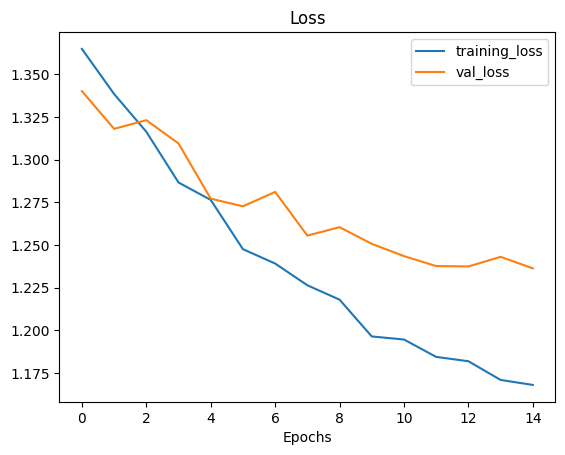

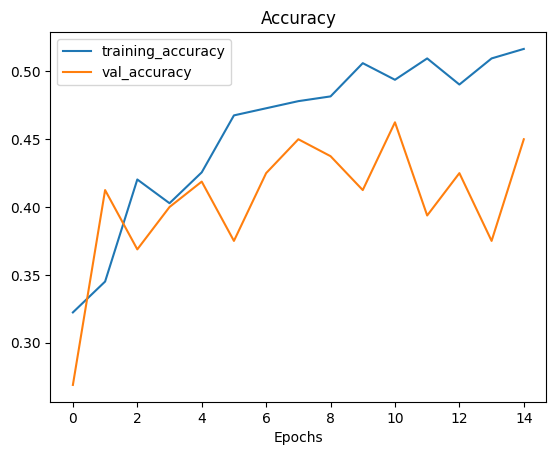

In [ ]:
plot_loss_curves(history1)

## Model2 - Feature Extracter - with Data augmentation, EfficientNetB0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_aug_layer = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
    #preprocessing.Rescale(1./255)
], name = 'data_aug_layer')

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (512, 512, 3))

x = data_aug_layer(inputs, training = True)
x = base_model(x, training = False)

x = GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model2 = tf.keras.Model(inputs = inputs, outputs = outputs)


In [ ]:
model2.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
history2 = model2.fit(train_data,
                      epochs = 15,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data),
                      callbacks = [create_tensorboard_callback('tensorboard/','model2_feature_extracter'),checkpoint_callback2]
           )

saving TensorBoard log files to : tensorboard//model2_feature_extracter
Epoch 1/15
18/18 [==============================] - ETA: 0s - loss: 1.4322 - accuracy: 0.2329
Epoch 1: val_loss improved from inf to 1.40712, saving model to model2_weights/checkpoint.ckpt
18/18 [==============================] - 66s 3s/step - loss: 1.4322 - accuracy: 0.2329 - val_loss: 1.4071 - val_accuracy: 0.2500
Epoch 2/15
18/18 [==============================] - ETA: 0s - loss: 1.3667 - accuracy: 0.3187
Epoch 2: val_loss improved from 1.40712 to 1.39055, saving model to model2_weights/checkpoint.ckpt
18/18 [==============================] - 54s 3s/step - loss: 1.3667 - accuracy: 0.3187 - val_loss: 1.3905 - val_accuracy: 0.2375
Epoch 3/15
18/18 [==============================] - ETA: 0s - loss: 1.3566 - accuracy: 0.3292
Epoch 3: val_loss improved from 1.39055 to 1.36461, saving model to model2_weights/checkpoint.ckpt
18/18 [==============================] - 48s 3s/step - loss: 1.3566 - accuracy: 0.3292 - val_lo

In [ ]:
model2.evaluate(test_data)

8/8 [==============================] - 15s 2s/step - loss: 1.4817 - accuracy: 0.2500


[1.4816837310791016, 0.25]

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 data_aug_layer (Sequential)  (None, None, None, 3)    0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 5,124
Non-trainable params: 4,049,571
_____________________________________________

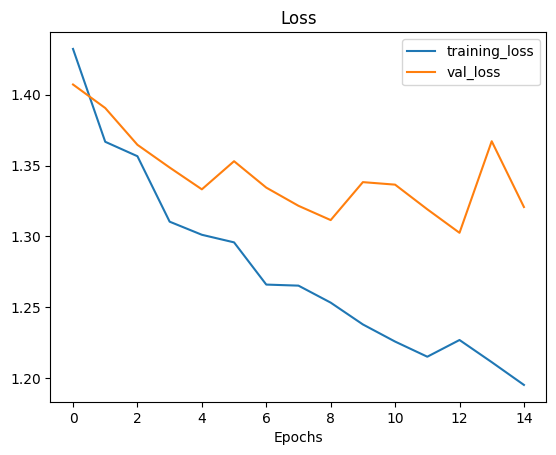

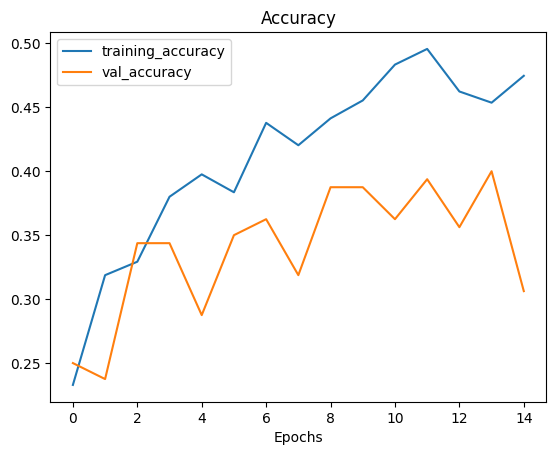

In [ ]:
plot_loss_curves(history2)

## Model 3 - top 10 layers trainable - without data augmentation

In [ ]:
model1.load_weights(checkpoint_path1)

In [ ]:
model1.layers

In [ ]:
for layer in model1.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fabe92e50d0> True
<keras.engine.functional.Functional object at 0x7fabd07fd400> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7fabd0877bb0> True
<keras.layers.core.dense.Dense object at 0x7fabd0877970> True


In [ ]:
for i, layer in enumerate(model1.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape=(512, 512, 3))

x = base_model(inputs)

x = GlobalAveragePooling2D()(x)

x = Dense(4, activation = 'softmax')(x)

model1 = tf.keras.Model(inputs = inputs, outputs = x)

In [ ]:
model1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning you typically lower the learning rate by some amount
               metrics = ['accuracy'])

In [ ]:
for layer_number, layer in enumerate(model1.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_7 False
1 rescaling_6 False
2 normalization_3 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
# fine tune for another 5 epochs
fine_tune_epochs = 15 + 15
history3 = model1.fit(train_data,
                      epochs = fine_tune_epochs,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           callbacks=[create_tensorboard_callback("tensorflow_hub", "model3_EfficientNetB0"), create_checkpoint("model3_weights/checkpoints3.cktp")],
           initial_epoch = history1.epoch[-1])

saving TensorBoard log files to : tensorflow_hub/model3_EfficientNetB0
Epoch 15/30
18/18 [==============================] - ETA: 0s - loss: 0.8570 - accuracy: 0.6830
Epoch 15: val_loss improved from inf to 1.17474, saving model to model3_weights/checkpoints3.cktp
18/18 [==============================] - 24s 735ms/step - loss: 0.8570 - accuracy: 0.6830 - val_loss: 1.1747 - val_accuracy: 0.4875
Epoch 16/30
18/18 [==============================] - ETA: 0s - loss: 0.8133 - accuracy: 0.6830
Epoch 16: val_loss improved from 1.17474 to 1.16583, saving model to model3_weights/checkpoints3.cktp
18/18 [==============================] - 14s 599ms/step - loss: 0.8133 - accuracy: 0.6830 - val_loss: 1.1658 - val_accuracy: 0.4688
Epoch 17/30
18/18 [==============================] - ETA: 0s - loss: 0.7968 - accuracy: 0.7215
Epoch 17: val_loss improved from 1.16583 to 1.16170, saving model to model3_weights/checkpoints3.cktp
18/18 [==============================] - 16s 685ms/step - loss: 0.7968 - accur

In [ ]:
model1.evaluate(test_data)

8/8 [==============================] - 5s 272ms/step - loss: 1.6933 - accuracy: 0.2833


[1.6932663917541504, 0.28333333134651184]

In [ ]:
model1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 898,356
Non-trainable params: 3,156,339
_________________________________________________________________


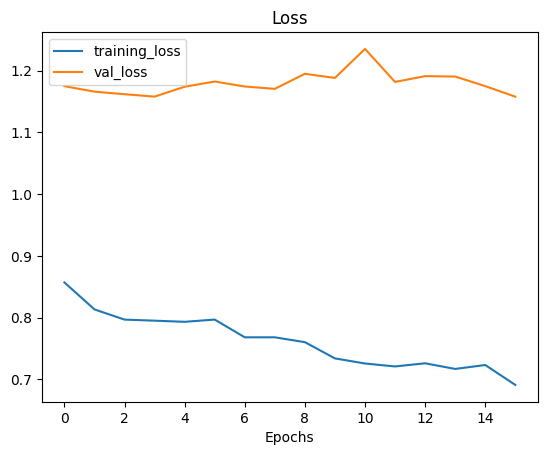

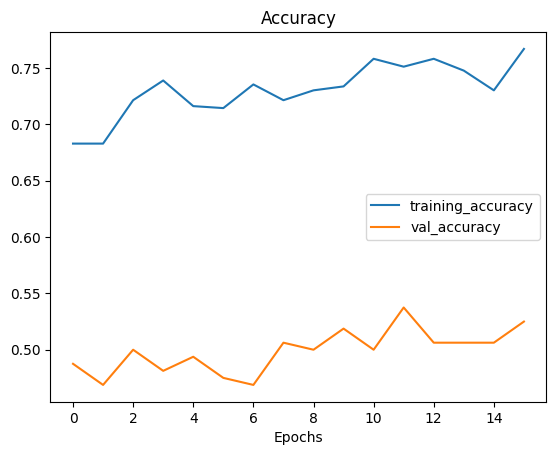

In [ ]:
plot_loss_curves(history3)

## Model4 - top 10 layers trainable with data augmentation

In [ ]:
for layer in model2.layers:
  print(layer)

In [ ]:
for i, layer in enumerate(model2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape = (512, 512, 3))

x = data_aug_layer(inputs, training = True)
x = base_model(x, training = False)

x = GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model2 = tf.keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model2.load_weights(checkpoint_path2)

In [ ]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning you typically lower the learning rate by some amount
               metrics = ['accuracy'])

In [ ]:
# fine tune for another 5 epochs
fine_tune_epochs = 15 + 15
history4 = model2.fit(train_data,
                      epochs = fine_tune_epochs,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           callbacks=[create_tensorboard_callback("tensorflow_hub", "model4_EfficientNetB0"),create_checkpoint("model4_weights/checkpoints4.cktp")],
           initial_epoch = history2.epoch[-1])

saving TensorBoard log files to : tensorflow_hub/model4_EfficientNetB0
Epoch 15/30
18/18 [==============================] - ETA: 0s - loss: 1.6233 - accuracy: 0.3117
Epoch 15: val_loss improved from inf to 1.39578, saving model to model4_weights/checkpoints4.cktp
18/18 [==============================] - 53s 2s/step - loss: 1.6233 - accuracy: 0.3117 - val_loss: 1.3958 - val_accuracy: 0.2313
Epoch 16/30
18/18 [==============================] - ETA: 0s - loss: 1.3350 - accuracy: 0.3573
Epoch 16: val_loss did not improve from 1.39578
18/18 [==============================] - 37s 2s/step - loss: 1.3350 - accuracy: 0.3573 - val_loss: 1.4148 - val_accuracy: 0.3375
Epoch 17/30
18/18 [==============================] - ETA: 0s - loss: 1.3154 - accuracy: 0.3608
Epoch 17: val_loss did not improve from 1.39578
18/18 [==============================] - 35s 2s/step - loss: 1.3154 - accuracy: 0.3608 - val_loss: 1.4171 - val_accuracy: 0.3063
Epoch 18/30
18/18 [==============================] - ETA: 0s - 

In [ ]:
model2.evaluate(test_data)

8/8 [==============================] - 11s 935ms/step - loss: 1.4893 - accuracy: 0.2500


[1.4893412590026855, 0.25]

In [ ]:
model2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 data_aug_layer (Sequential)  (None, None, None, 3)    0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_7   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 898,356
Non-trainable params: 3,156,339
___________________________________________

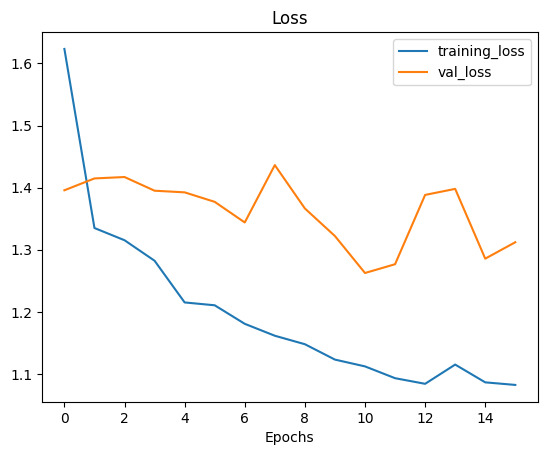

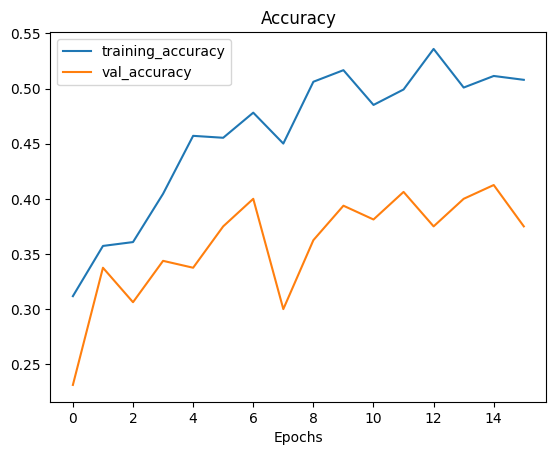

In [ ]:
plot_loss_curves(history4)

Model 5 - top 20 trainable layers without data augmentation

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-20]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape=(512, 512, 3))

x = base_model(inputs)

x = GlobalAveragePooling2D()(x)

x = Dense(4, activation = 'softmax')(x)

model1 = tf.keras.Model(inputs = inputs, outputs = x)

In [ ]:
model1.load_weights('model3_weights/checkpoints3.cktp')

In [ ]:
model1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning you typically lower the learning rate by some amount
               metrics = ['accuracy'])

In [ ]:
# fine tune for another 5 epochs
fine_tune_epochs = 15 + 15 + 30
history5 = model1.fit(train_data,
                      epochs = fine_tune_epochs,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           callbacks=[create_tensorboard_callback("tensorflow_hub", "model5_EfficientNetB0"), create_checkpoint("model5_weights/checkpoints5.cktp")],
           initial_epoch = 30)

saving TensorBoard log files to : tensorflow_hub/model5_EfficientNetB0
Epoch 31/60
18/18 [==============================] - ETA: 0s - loss: 0.9470 - accuracy: 0.6200
Epoch 31: val_loss improved from inf to 1.28148, saving model to model5_weights/checkpoints5.cktp
18/18 [==============================] - 38s 852ms/step - loss: 0.9470 - accuracy: 0.6200 - val_loss: 1.2815 - val_accuracy: 0.4812
Epoch 32/60
18/18 [==============================] - ETA: 0s - loss: 0.8334 - accuracy: 0.6953
Epoch 32: val_loss improved from 1.28148 to 1.18424, saving model to model5_weights/checkpoints5.cktp
18/18 [==============================] - 14s 621ms/step - loss: 0.8334 - accuracy: 0.6953 - val_loss: 1.1842 - val_accuracy: 0.4688
Epoch 33/60
18/18 [==============================] - ETA: 0s - loss: 0.7191 - accuracy: 0.7583
Epoch 33: val_loss did not improve from 1.18424
18/18 [==============================] - 13s 561ms/step - loss: 0.7191 - accuracy: 0.7583 - val_loss: 1.2113 - val_accuracy: 0.4812


In [ ]:
model1.evaluate(test_data)

8/8 [==============================] - 7s 423ms/step - loss: 2.4824 - accuracy: 0.2625


[2.482421875, 0.26249998807907104]

In [ ]:
model1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 1,356,084
Non-trainable params: 2,698,611
_________________________________________________________________


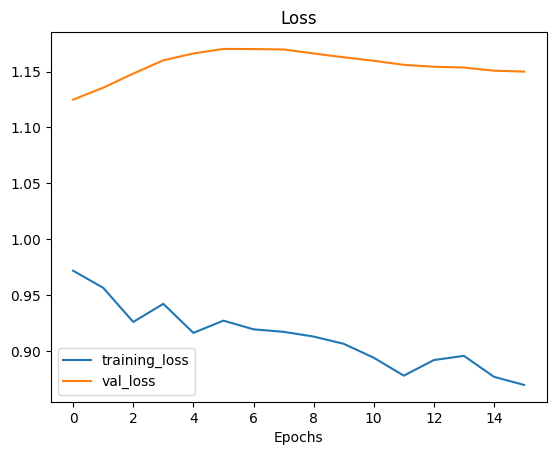

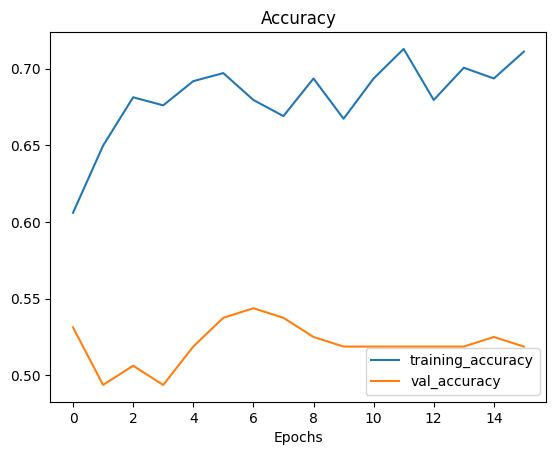

In [ ]:
plot_loss_curves(history5)

## Model 6 - top 20 trainable layers with data augmentation

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape = (512, 512, 3))

x = data_aug_layer(inputs, training = True)
x = base_model(x, training = False)

x = GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model2 = tf.keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model2.load_weights("model4_weights/checkpoints4.cktp")

In [ ]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning you typically lower the learning rate by some amount
               metrics = ['accuracy'])

In [ ]:
# fine tune for another 5 epochs
fine_tune_epochs = 15 + 15 + 45
history6 = model2.fit(train_data,
                      epochs = fine_tune_epochs,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           callbacks=[create_tensorboard_callback("tensorflow_hub", "model6_EfficientNetB0"),create_checkpoint("model6_weights/checkpoints6.cktp")],
           initial_epoch = 30)

saving TensorBoard log files to : tensorflow_hub/model6_EfficientNetB0
Epoch 31/75
18/18 [==============================] - ETA: 0s - loss: 1.4720 - accuracy: 0.3117
Epoch 31: val_loss improved from inf to 1.42985, saving model to model6_weights/checkpoints6.cktp
18/18 [==============================] - 83s 4s/step - loss: 1.4720 - accuracy: 0.3117 - val_loss: 1.4299 - val_accuracy: 0.2500
Epoch 32/75
18/18 [==============================] - ETA: 0s - loss: 1.3899 - accuracy: 0.2750
Epoch 32: val_loss improved from 1.42985 to 1.37370, saving model to model6_weights/checkpoints6.cktp
18/18 [==============================] - 50s 3s/step - loss: 1.3899 - accuracy: 0.2750 - val_loss: 1.3737 - val_accuracy: 0.3187
Epoch 33/75
18/18 [==============================] - ETA: 0s - loss: 1.3442 - accuracy: 0.3433
Epoch 33: val_loss did not improve from 1.37370
18/18 [==============================] - 52s 3s/step - loss: 1.3442 - accuracy: 0.3433 - val_loss: 1.3915 - val_accuracy: 0.3438
Epoch 34/

In [ ]:
model2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 data_aug_layer (Sequential)  (None, None, None, 3)    0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_8   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 1,356,084
Non-trainable params: 2,698,611
_________________________________________